### Ищенко А.С. ИУ5-65Б Лабораторная работа  № 5 "Ансамбли моделей машинного обучения."

### Цель лабораторной работы: 
изучение ансамблей моделей машинного обучения.

### Задание:
Выберите набор данных (датасет) для решения задачи классификации или регресии.

В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие ансамблевые модели:

одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
одну из моделей группы бустинга;
одну из моделей группы стекинга.
(+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:

Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.

Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

# Ансамблевые модели

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Исследование датасета

In [2]:
# загрузка данных
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
print('Все возможные классы в датасете:', len(list(df["species"].unique())))
index = 1
for iris_species in list(df["species"].unique()):
    print(str(index) + '.', iris_species)
    index += 1

Все возможные классы в датасете: 3
1. Iris-setosa
2. Iris-versicolor
3. Iris-virginica


In [5]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
new_column = ord_enc.fit_transform(df[['species']])
df = df.drop(columns=['species'], axis=1)
df['species'] = new_column + 1
df['species'] = df['species'].astype(np.integer)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Обучающая и тестовая выборки

In [6]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df, test_size=0.33, random_state=42)

## Бэггинг

Обучим классификатор на 3 деревьях

In [7]:
from sklearn.ensemble import BaggingClassifier

bc1 = BaggingClassifier(n_estimators=3, oob_score=True, random_state=10)
bc1.fit(data_train[["sepal_length", "sepal_width"]], data_train["species"])

/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=3, oob_score=True, random_state=10)

Объекты, использованные в обучающей выборке каждого дерева:

In [8]:
bc1.estimators_samples_

[array([37,  9, 49, 52, 14, 10, 26, 74, 24, 10, 63, 51, 50, 44, 67, 34, 93,
        24, 43, 59, 21, 58, 58, 46, 75, 27, 74, 19, 37, 45, 59, 54,  4, 44,
        14, 69, 28, 75, 97, 74, 23, 39, 60, 64, 43,  0, 50, 73, 22, 78, 43,
        42, 77, 28, 50,  4, 14, 56, 42, 68, 76, 43, 39, 68, 63, 43, 11, 84,
        95, 80, 48, 31, 97, 56, 54, 71, 50, 82, 10, 92,  8, 77,  4, 79, 62,
        44, 60, 90, 74, 25, 67,  9, 69, 25, 88, 14,  2, 47, 41, 91]),
 array([95, 87, 46, 98, 93,  1, 44,  8, 98, 87, 21, 61, 68, 87, 55, 31, 34,
        17, 58, 34, 38, 79, 21, 80, 88, 38, 70, 22, 88, 39, 52, 24, 19, 44,
        19, 30, 15, 49, 50, 39, 52, 41,  2, 14, 47, 33, 18, 13, 10, 13, 62,
        24, 15, 63, 57, 17, 48, 62, 52, 99, 23, 52,  0, 87, 16, 67, 50, 59,
        82, 43, 55,  7, 82,  4, 51, 98, 35, 78, 52, 35, 63, 81, 58, 67, 20,
        97, 81, 54, 88, 49, 49, 41, 16, 86, 13, 67, 20, 68, 33,  0]),
 array([25, 54,  3, 76, 41, 99, 54, 92, 55, 77, 38, 13, 40, 18, 72, 51, 50,
        29, 42, 61, 54, 

Построим бинарную матрицу, чтобы наглядно показать данные, попавшие в обучающую выборку. 1 = попадание в выборку

In [9]:
bin_array = np.zeros((3, data_train[["sepal_length", "sepal_width"]].shape[0]))
for i in range(3):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 0.],
       [1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1.

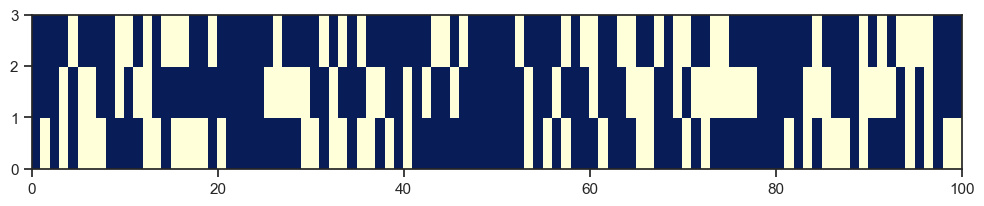

In [10]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

Синим показаны данные, попавшие в обучающую выборку

## Оценка Out-of-bag error

In [11]:
for i in range(3):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 38.0%
Для модели № 2 размер OOB составляет 40.0%
Для модели № 3 размер OOB составляет 33.0%


In [12]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.56, 0.43999999999999995)

In [13]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# В данном примере три класса, 
# значения nan могут возвращаться в случае маленькой выборки
bc1.oob_decision_function_[55:70]


array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [nan, nan, nan],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [nan, nan, nan],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [nan, nan, nan],
       [0.5, 0.5, 0. ]])

## Визуализация обученных деревьев

[Text(0.3875, 0.9444444444444444, 'X[0] <= 5.45\ngini = 0.663\nsamples = 62\nvalue = [29, 37, 34]'),
 Text(0.13333333333333333, 0.8333333333333334, 'X[1] <= 2.8\ngini = 0.334\nsamples = 21\nvalue = [26, 7, 0]'),
 Text(0.06666666666666667, 0.7222222222222222, 'X[0] <= 4.7\ngini = 0.278\nsamples = 4\nvalue = [1, 5, 0]'),
 Text(0.03333333333333333, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.1, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 5, 0]'),
 Text(0.2, 0.7222222222222222, 'X[0] <= 5.35\ngini = 0.137\nsamples = 17\nvalue = [25, 2, 0]'),
 Text(0.16666666666666666, 0.6111111111111112, 'gini = 0.0\nsamples = 15\nvalue = [23, 0, 0]'),
 Text(0.23333333333333334, 0.6111111111111112, 'X[1] <= 3.45\ngini = 0.5\nsamples = 2\nvalue = [2, 2, 0]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]'),
 Text(0.26666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0]'),
 Text(0.6416666666666667, 0.8333333333333334, 'X[0] <= 6.05\ngini

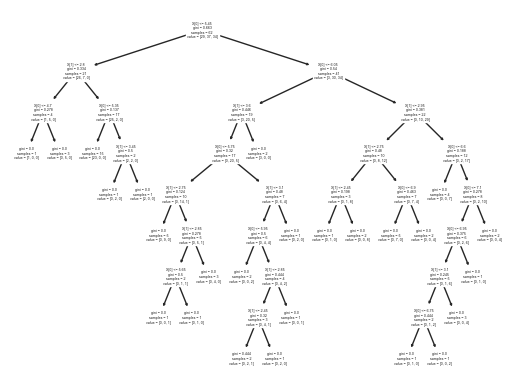

In [14]:
from sklearn import tree

tree.plot_tree(bc1.estimators_[0]) 

[Text(0.4264705882352941, 0.9615384615384616, 'X[0] <= 5.55\ngini = 0.664\nsamples = 60\nvalue = [33, 30, 37]'),
 Text(0.23529411764705882, 0.8846153846153846, 'X[1] <= 2.65\ngini = 0.157\nsamples = 20\nvalue = [32, 3, 0]'),
 Text(0.17647058823529413, 0.8076923076923077, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.29411764705882354, 0.8076923076923077, 'gini = 0.0\nsamples = 18\nvalue = [32, 0, 0]'),
 Text(0.6176470588235294, 0.8846153846153846, 'X[0] <= 6.25\ngini = 0.503\nsamples = 40\nvalue = [1, 27, 37]'),
 Text(0.4117647058823529, 0.8076923076923077, 'X[1] <= 3.6\ngini = 0.42\nsamples = 21\nvalue = [1, 23, 8]'),
 Text(0.35294117647058826, 0.7307692307692307, 'X[1] <= 2.55\ngini = 0.383\nsamples = 20\nvalue = [0, 23, 8]'),
 Text(0.23529411764705882, 0.6538461538461539, 'X[0] <= 5.85\ngini = 0.48\nsamples = 3\nvalue = [0, 2, 3]'),
 Text(0.17647058823529413, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]'),
 Text(0.29411764705882354, 0.5769230769230769, 'g

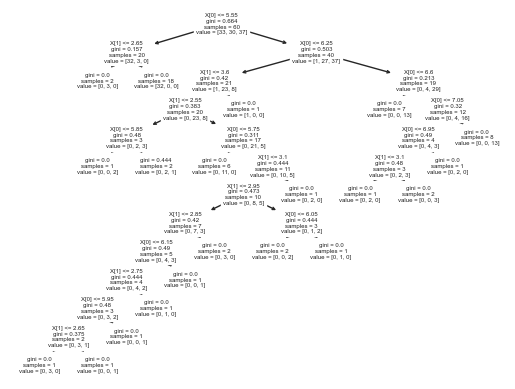

In [15]:
tree.plot_tree(bc1.estimators_[1]) 

[Text(0.34210526315789475, 0.9615384615384616, 'X[0] <= 5.45\ngini = 0.665\nsamples = 67\nvalue = [36, 31, 33]'),
 Text(0.15789473684210525, 0.8846153846153846, 'X[1] <= 3.05\ngini = 0.234\nsamples = 23\nvalue = [32, 5, 0]'),
 Text(0.10526315789473684, 0.8076923076923077, 'X[0] <= 4.7\ngini = 0.5\nsamples = 6\nvalue = [5, 5, 0]'),
 Text(0.05263157894736842, 0.7307692307692307, 'gini = 0.0\nsamples = 2\nvalue = [5, 0, 0]'),
 Text(0.15789473684210525, 0.7307692307692307, 'gini = 0.0\nsamples = 4\nvalue = [0, 5, 0]'),
 Text(0.21052631578947367, 0.8076923076923077, 'gini = 0.0\nsamples = 17\nvalue = [27, 0, 0]'),
 Text(0.5263157894736842, 0.8846153846153846, 'X[0] <= 6.1\ngini = 0.551\nsamples = 44\nvalue = [4, 26, 33]'),
 Text(0.3157894736842105, 0.8076923076923077, 'X[1] <= 3.6\ngini = 0.532\nsamples = 21\nvalue = [4, 17, 6]'),
 Text(0.2631578947368421, 0.7307692307692307, 'X[0] <= 5.55\ngini = 0.386\nsamples = 19\nvalue = [0, 17, 6]'),
 Text(0.21052631578947367, 0.6538461538461539, 'gin

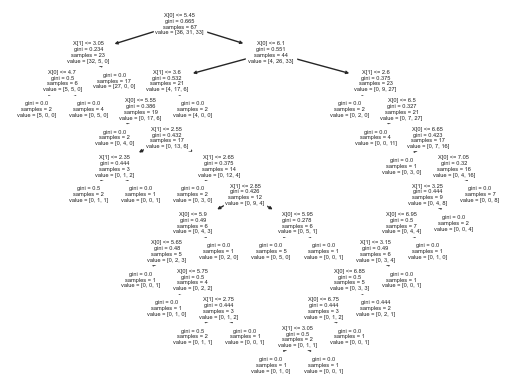

In [16]:
tree.plot_tree(bc1.estimators_[2]) 

## Визуализация результатов классификации

In [17]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_cl(clf):
    title = clf.__repr__
    clf.fit(data_train[["sepal_length", "sepal_width"]], data_train[['species']])
    fig, ax = plt.subplots(figsize=(5,5))
    X0 = data_train["sepal_length"]
    X1 = data_train["sepal_width"]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=data_train['species'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('sepal_length')
    ax.set_ylabel('sepal_width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


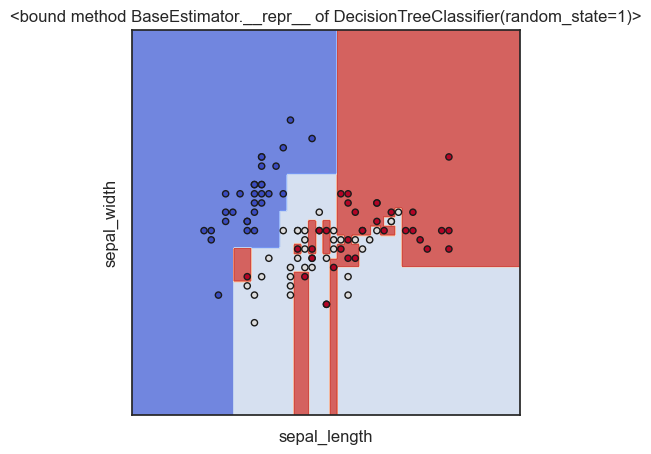

In [18]:
from sklearn.tree import DecisionTreeClassifier

plot_cl(DecisionTreeClassifier(random_state=1))

/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


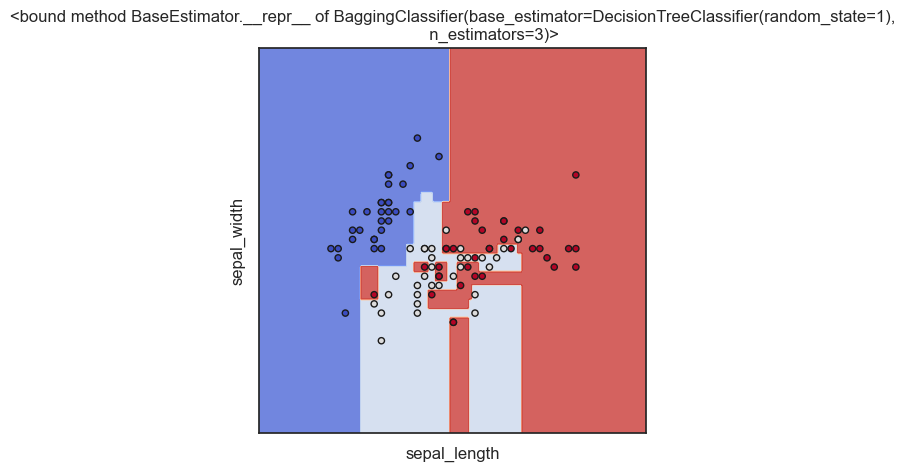

In [19]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=3))

/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


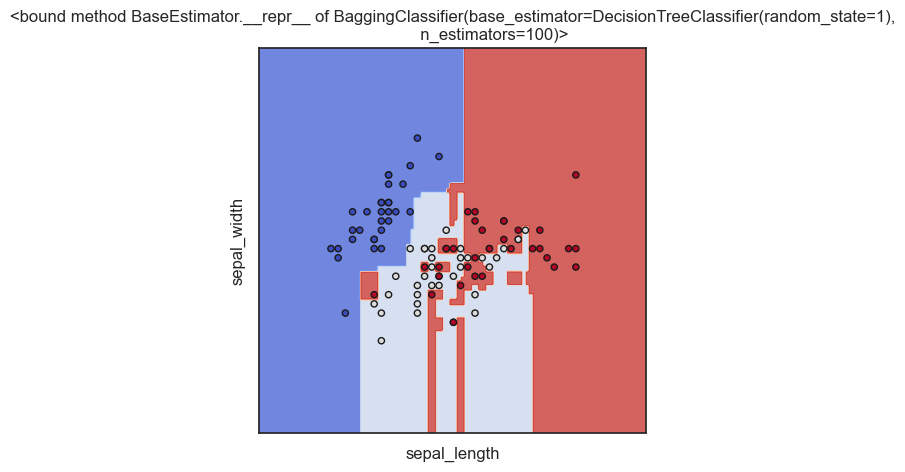

In [20]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100))

## Бустинг

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

Как всегда обучим модель на 3 деревьях

In [23]:
ab1 = AdaBoostClassifier(n_estimators=3, algorithm='SAMME', random_state=10)
ab1.fit(data_train[["sepal_length", "sepal_width"]], data_train[['species']])

/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME', n_estimators=3, random_state=10)

[Text(0.5, 0.75, 'X[0] <= 5.45\ngini = 0.666\nsamples = 100\nvalue = [0.31, 0.35, 0.34]'),
 Text(0.25, 0.25, 'gini = 0.323\nsamples = 36\nvalue = [0.29, 0.06, 0.01]'),
 Text(0.75, 0.25, 'gini = 0.528\nsamples = 64\nvalue = [0.02, 0.29, 0.33]')]

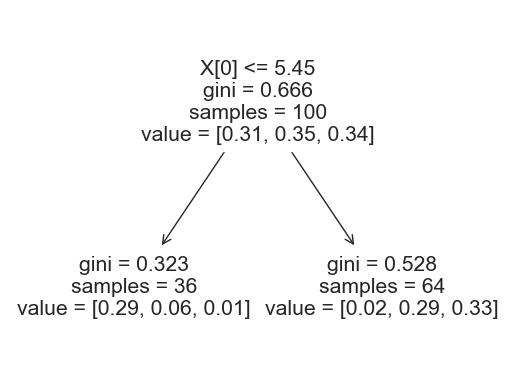

In [24]:
tree.plot_tree(ab1.estimators_[0]) 

[Text(0.5, 0.75, 'X[1] <= 3.25\ngini = 0.548\nsamples = 100\nvalue = [0.191, 0.614, 0.195]'),
 Text(0.25, 0.25, 'gini = 0.424\nsamples = 75\nvalue = [0.065, 0.614, 0.163]'),
 Text(0.75, 0.25, 'gini = 0.324\nsamples = 25\nvalue = [0.126, 0.0, 0.032]')]

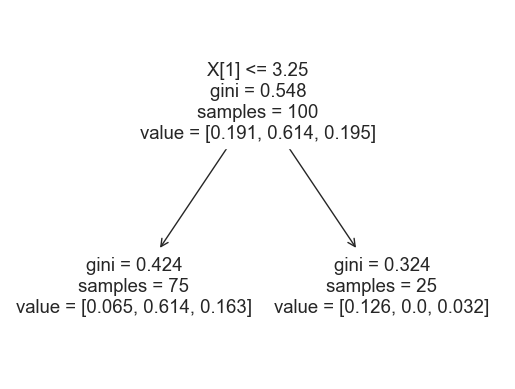

In [25]:
tree.plot_tree(ab1.estimators_[1]) 

[Text(0.5, 0.75, 'X[0] <= 5.55\ngini = 0.623\nsamples = 100\nvalue = [0.223, 0.276, 0.501]'),
 Text(0.25, 0.25, 'gini = 0.526\nsamples = 41\nvalue = [0.215, 0.079, 0.045]'),
 Text(0.75, 0.25, 'gini = 0.435\nsamples = 59\nvalue = [0.008, 0.197, 0.456]')]

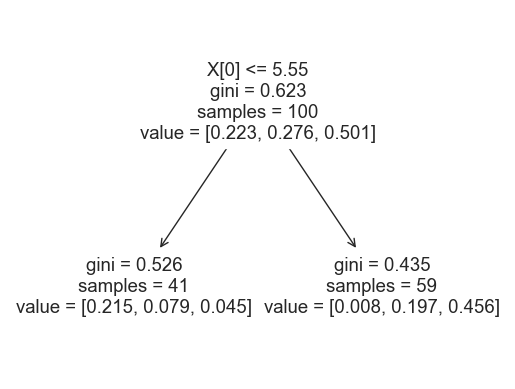

In [26]:
tree.plot_tree(ab1.estimators_[2]) 

## Визуализация классификации

/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


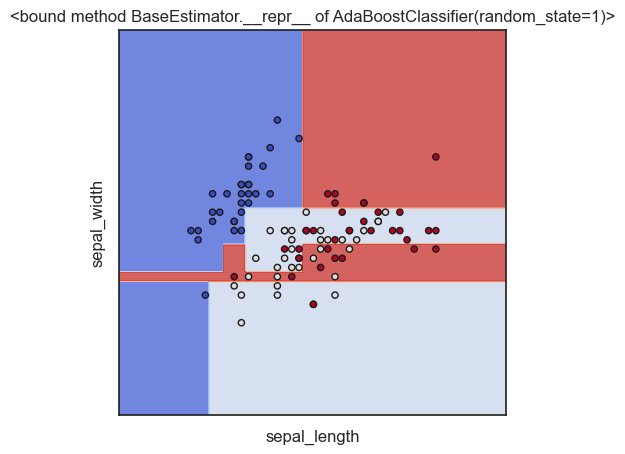

In [27]:
plot_cl(AdaBoostClassifier(random_state=1))

In [28]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

## Визуализация важности признаков

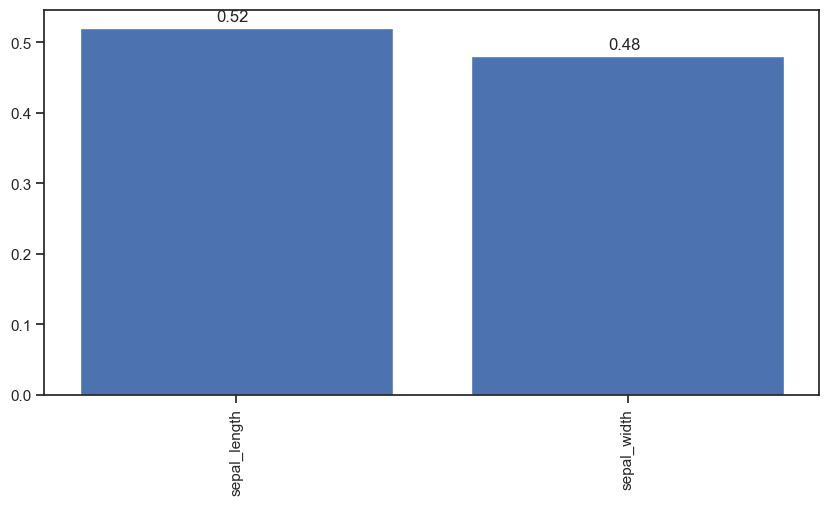

In [29]:
dataset_x_ds = pd.DataFrame(data=df[["sepal_length", "sepal_width"]], columns=['sepal_length', 'sepal_width'])
ab2 = AdaBoostClassifier(random_state=1)
ab2.fit(dataset_x_ds, df["species"])
_,_ = draw_feature_importances(ab2, dataset_x_ds)

GradientBoostingClassifier (актуальный алгоритм для бустинга)

/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


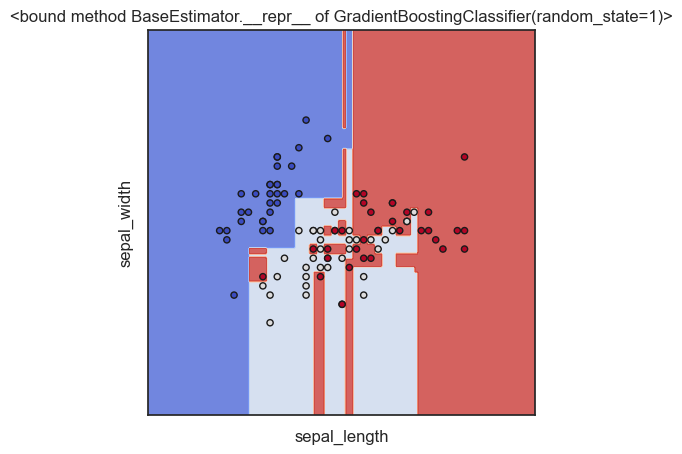

In [30]:
plot_cl(GradientBoostingClassifier(random_state=1))

## Важность признаков

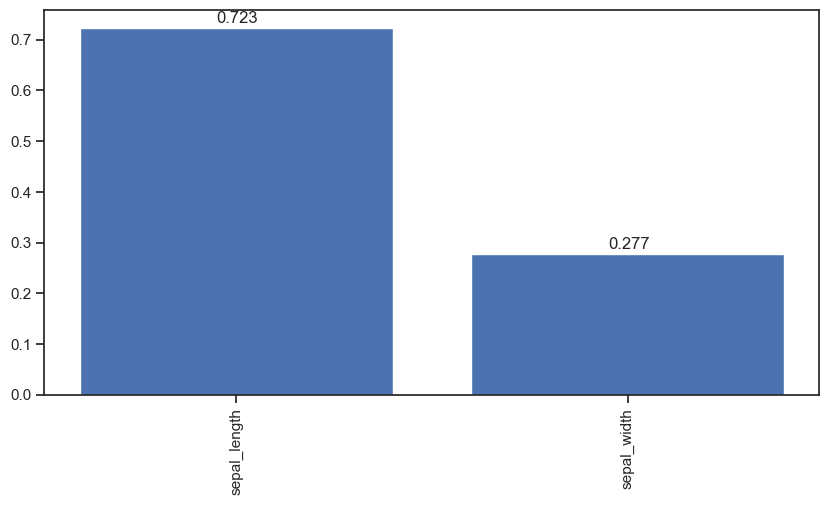

In [31]:
dataset_gb_cl = GradientBoostingClassifier(random_state=1)
dataset_gb_cl.fit(dataset_x_ds, df["species"])
_,_ = draw_feature_importances(dataset_gb_cl, dataset_x_ds)

## Стекинг

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [33]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(),
              LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [34]:
clf.fit(data_train[["sepal_length", "sepal_width"]], data_train['species'])

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

Средняя точность:

In [35]:
clf.fit(data_train[["sepal_length", "sepal_width"]], data_train['species']).score(data_test[["sepal_length", "sepal_width"]], data_test['species'])
1.0

1.0

In [36]:
clf.decision_function(df[["sepal_length", "sepal_width"]])[55:65]

array([[-2.40464492,  1.66033439,  0.74431053],
       [-2.76409031,  1.17142229,  1.59266802],
       [-0.59929425,  1.25608082, -0.65678657],
       [-5.51598703,  2.41264397,  3.10334306],
       [-0.74363511,  1.1841693 , -0.4405342 ],
       [-2.67611702,  2.33497516,  0.34114186],
       [-2.39239452,  1.42080148,  0.97159305],
       [-5.78340308,  2.97237521,  2.81102787],
       [-3.61218593,  1.97232393,  1.639862  ],
       [-1.53635723,  1.22275987,  0.31359736]])